# NOTES FOR PAPER:


In [1]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils import *

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy import stats


plt.style.use('../style.mplstyle')
df = pd.read_csv("../latest.csv")

c:\Users\sevi\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
df = fix_data(df, drop_zeros=False)

In [3]:
print("length of df: ", len(df))
print('\n')
df.head(1)

length of df:  106




,StartDate,reading,Duration,Progress,Finished,Q42,Q43,Q1,Q1_7_TEXT,Q2,...,Q16_3,Q16_4,Q16_5,Q16_6,Q16_7,Q16_8,Q16_9,Q17,Q18,Q46
0,2024-08-08 23:30:29,7,118,100,True,Agree,LinkedIn DM,Industry,NaN,2.0,...,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,NaN,NaN,NaN


In [4]:
df.columns

Index(['StartDate', 'reading', 'Duration', 'Progress', 'Finished', 'Q42',
       'Q43', 'Q1', 'Q1_7_TEXT', 'Q2', 'Q3_1', 'Q3_2', 'Q3_3', 'Q3_4', 'Q4_1',
       'Q4_2', 'Q4_3', 'Q4_4', 'Q5', 'Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5',
       'Q6_6', 'Q6_7', 'Q6_8', 'Q6_9', 'Q15', 'Q16_1', 'Q16_2', 'Q16_3',
       'Q16_4', 'Q16_5', 'Q16_6', 'Q16_7', 'Q16_8', 'Q16_9', 'Q17', 'Q18',
       'Q46'],
      dtype='object')

# WANT the scores for timelines, the scores for each QUESTION, familiarity with each alignment concept, familiarity with empirical ML, when should we build?

In [5]:
# Q3: How familiar are you with the following empirical AI concepts?
# Q4: How familiar are you with the following theoretical AI Alignment concepts?
# Q5: Which best describes your position on when we should build AGI (Artificial General Intelligence)? # For the purposes of this survey, we define AGI as: AI systems that are better at STEM research than the best human scientists, in addition to potentially having other advanced capabilities.

# Q6: rate your agreement with the following statements

# replace the qualitative data with the quantitative data

In [6]:
df['Q3_1'].value_counts().sort_index()

Know a fair amount    23
Know a little         13
Know it well          50
Name: Q3_1, dtype: int64

In [7]:
timelines_positions = {
    "We should develop more powerful and more general systems as fast as possible": 5,
    "Soon, but not as fast as possible": 3.75,
    "Eventually, but not soon.": 2.5,
    "We should never build AGI": 1.25
}

agreement_swaps = {
    "strongly disagree": 1,
    "Somewhat disagree": 2,
    "Neither agree nor disagree": 3,
    "Somewhat agree": 4,
    "Strongly agree": 5,
}

familiarity_swaps = {
    "Never heard of it": 1,
    "Heard of it": 2,
    "Know a little": 3,
    "Know a fair amount": 4,
    "Know it well": 5,
}

pre_questions = [f'Q6_{i}' for i in range(1, 10)]
familiarity_questions = [f'Q3_{i}' for i in range(1, 4)]
timelines_questions = "Q5"


In [8]:
# get just the df of the questions we care about
df = df[pre_questions + familiarity_questions + [timelines_questions]]
# df = df[pre_questions + [timelines_questions]]

In [9]:
# replace the strings with numbers
df = df.replace({
    **agreement_swaps,
    **familiarity_swaps,
    **timelines_positions,
})

df

,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9,Q3_1,Q3_2,Q3_3,Q5
0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,1.0,5.00
1,4.0,4.0,1.0,3.0,4.0,2.0,3.0,4.0,5.0,4.0,4.0,2.0,3.75
2,4.0,1.0,1.0,3.0,3.0,4.0,1.0,3.0,4.0,5.0,5.0,5.0,2.50
3,2.0,4.0,2.0,3.0,4.0,2.0,4.0,1.0,5.0,5.0,4.0,1.0,1.25
4,4.0,4.0,2.0,3.0,2.0,1.0,3.0,2.0,5.0,5.0,5.0,2.0,2.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,4.0,4.0,2.0,5.0,3.0,4.0,4.0,2.0,5.0,5.0,5.0,1.0,2.50
103,4.0,3.0,2.0,3.0,4.0,4.0,3.0,2.0,4.0,5.0,4.0,1.0,5.00
104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# rename columns Q6_1 -> Q6_9 to "agreement_x"
df = df.rename(columns={k: f"agreement_{i}" for i, k in enumerate(pre_questions, 1)})

# rename columns Q3_1 -> Q3_3 to "familiarity_x"
df = df.rename(columns={k: f"familiarity_{i}" for i, k in enumerate(familiarity_questions, 1)})

# rename Q5 to "timelines"
df = df.rename(columns={timelines_questions: "timelines"})

In [22]:
df.columns

Index(['agreement_1', 'agreement_2', 'agreement_3', 'agreement_4',
       'agreement_5', 'agreement_6', 'agreement_7', 'agreement_8',
       'agreement_9', 'familiarity_1', 'familiarity_2', 'familiarity_3',
       'timelines'],
      dtype='object')

In [21]:
# drop the rows with NaN
df = df.dropna()
df

,agreement_1,agreement_2,agreement_3,agreement_4,agreement_5,agreement_6,agreement_7,agreement_8,agreement_9,familiarity_1,familiarity_2,familiarity_3,timelines
0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,1.0,5.00
1,4.0,4.0,1.0,3.0,4.0,2.0,3.0,4.0,5.0,4.0,4.0,2.0,3.75
2,4.0,1.0,1.0,3.0,3.0,4.0,1.0,3.0,4.0,5.0,5.0,5.0,2.50
3,2.0,4.0,2.0,3.0,4.0,2.0,4.0,1.0,5.0,5.0,4.0,1.0,1.25
4,4.0,4.0,2.0,3.0,2.0,1.0,3.0,2.0,5.0,5.0,5.0,2.0,2.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,2.0,1.0,5.0,2.0,3.0,5.0,3.0,1.0,1.0,3.0,1.0,1.0,3.75
100,5.0,3.0,1.0,3.0,1.0,1.0,3.0,3.0,5.0,5.0,5.0,5.0,1.25
102,4.0,4.0,2.0,5.0,3.0,4.0,4.0,2.0,5.0,5.0,5.0,1.0,2.50
103,4.0,3.0,2.0,3.0,4.0,4.0,3.0,2.0,4.0,5.0,4.0,1.0,5.00


In [11]:
# make a correlation matrix
corr = df.corr()

In [12]:
corr

,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9,Q3_1,Q3_2,Q3_3,Q5
Q6_1,1.000000,0.013416,-0.323391,0.228494,0.331588,0.209998,-0.282695,0.306092,-0.209627,0.209911,0.242772,0.216876,0.087208
Q6_2,0.013416,1.000000,0.067339,-0.049224,-0.227772,-0.207759,0.327208,0.070122,0.164593,-0.017936,0.249619,-0.040812,-0.047938
Q6_3,-0.323391,0.067339,1.000000,-0.012500,-0.036712,-0.000192,0.160066,0.050923,0.012799,-0.203068,-0.204255,-0.150256,0.037698
Q6_4,0.228494,-0.049224,-0.012500,1.000000,0.461805,0.386953,-0.014035,-0.137560,-0.004219,0.172885,0.158934,0.047737,0.024255
Q6_5,0.331588,-0.227772,-0.036712,0.461805,1.000000,0.640732,-0.222707,-0.021310,-0.128322,0.087901,0.061680,0.067409,0.305841
Q6_6,0.209998,-0.207759,-0.000192,0.386953,0.640732,1.000000,-0.265257,-0.074219,-0.331018,0.170675,-0.057666,0.026021,0.255978
Q6_7,-0.282695,0.327208,0.160066,-0.014035,-0.222707,-0.265257,1.000000,0.053840,0.274183,-0.072597,0.125652,-0.097918,-0.213453
Q6_8,0.306092,0.070122,0.050923,-0.137560,-0.021310,-0.074219,0.053840,1.000000,-0.023565,0.005758,0.101386,0.064095,0.229947
Q6_9,-0.209627,0.164593,0.012799,-0.004219,-0.128322,-0.331018,0.274183,-0.023565,1.000000,0.021899,0.079456,0.035560,-0.188585
Q3_1,0.209911,-0.017936,-0.203068,0.172885,0.087901,0.170675,-0.072597,0.005758,0.021899,1.000000,0.619883,0.407618,0.007523


In [13]:
# Q3: How familiar are you with the following empirical AI concepts?
# Q4: How familiar are you with the following theoretical AI Alignment concepts?
# Q5: Which best describes your position on when we should build AGI (Artificial General Intelligence)? # For the purposes of this survey, we define AGI as: AI systems that are better at STEM research than the best human scientists, in addition to potentially having other advanced capabilities.

# Q6: rate your agreement with the following statements

In [14]:
# 5 = STRONGLY agree
# 5 == for when should we build 

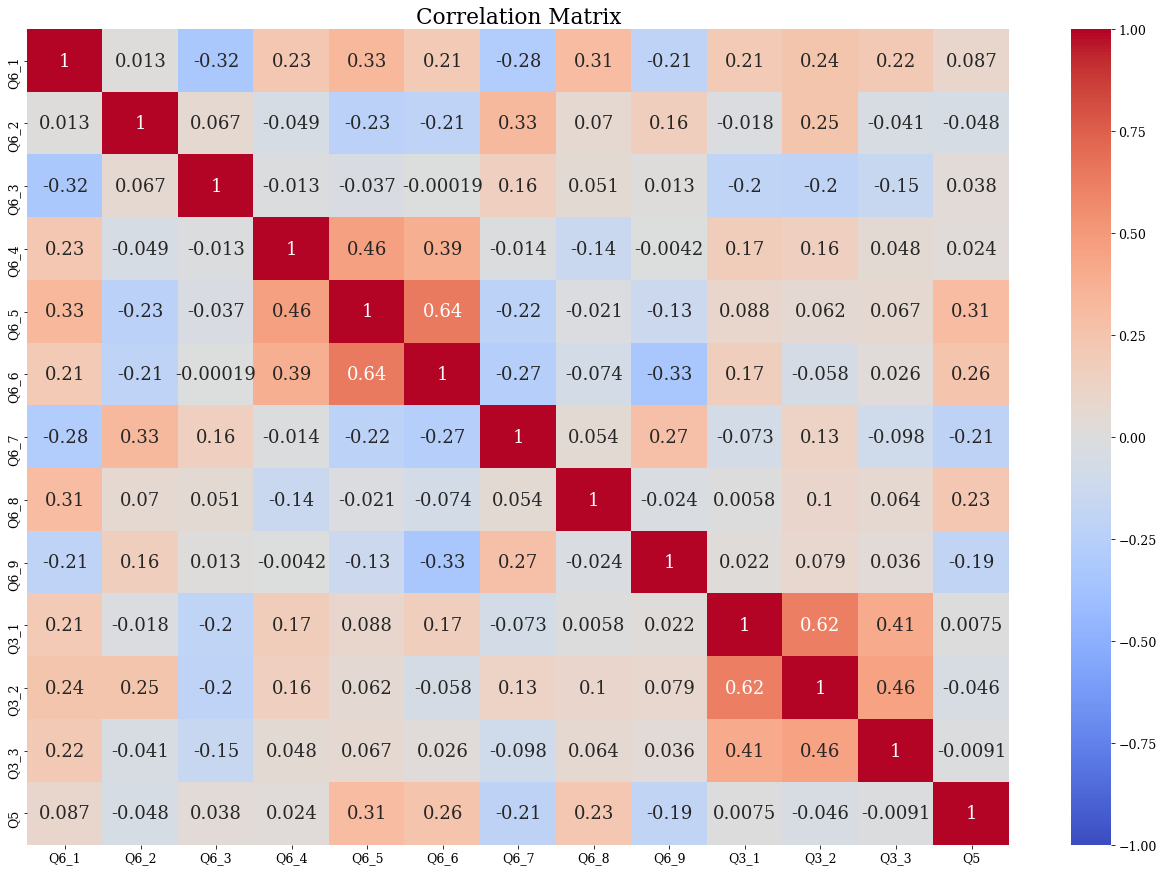

In [15]:
# plot the correlation matrix
plt.figure(figsize=(22, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


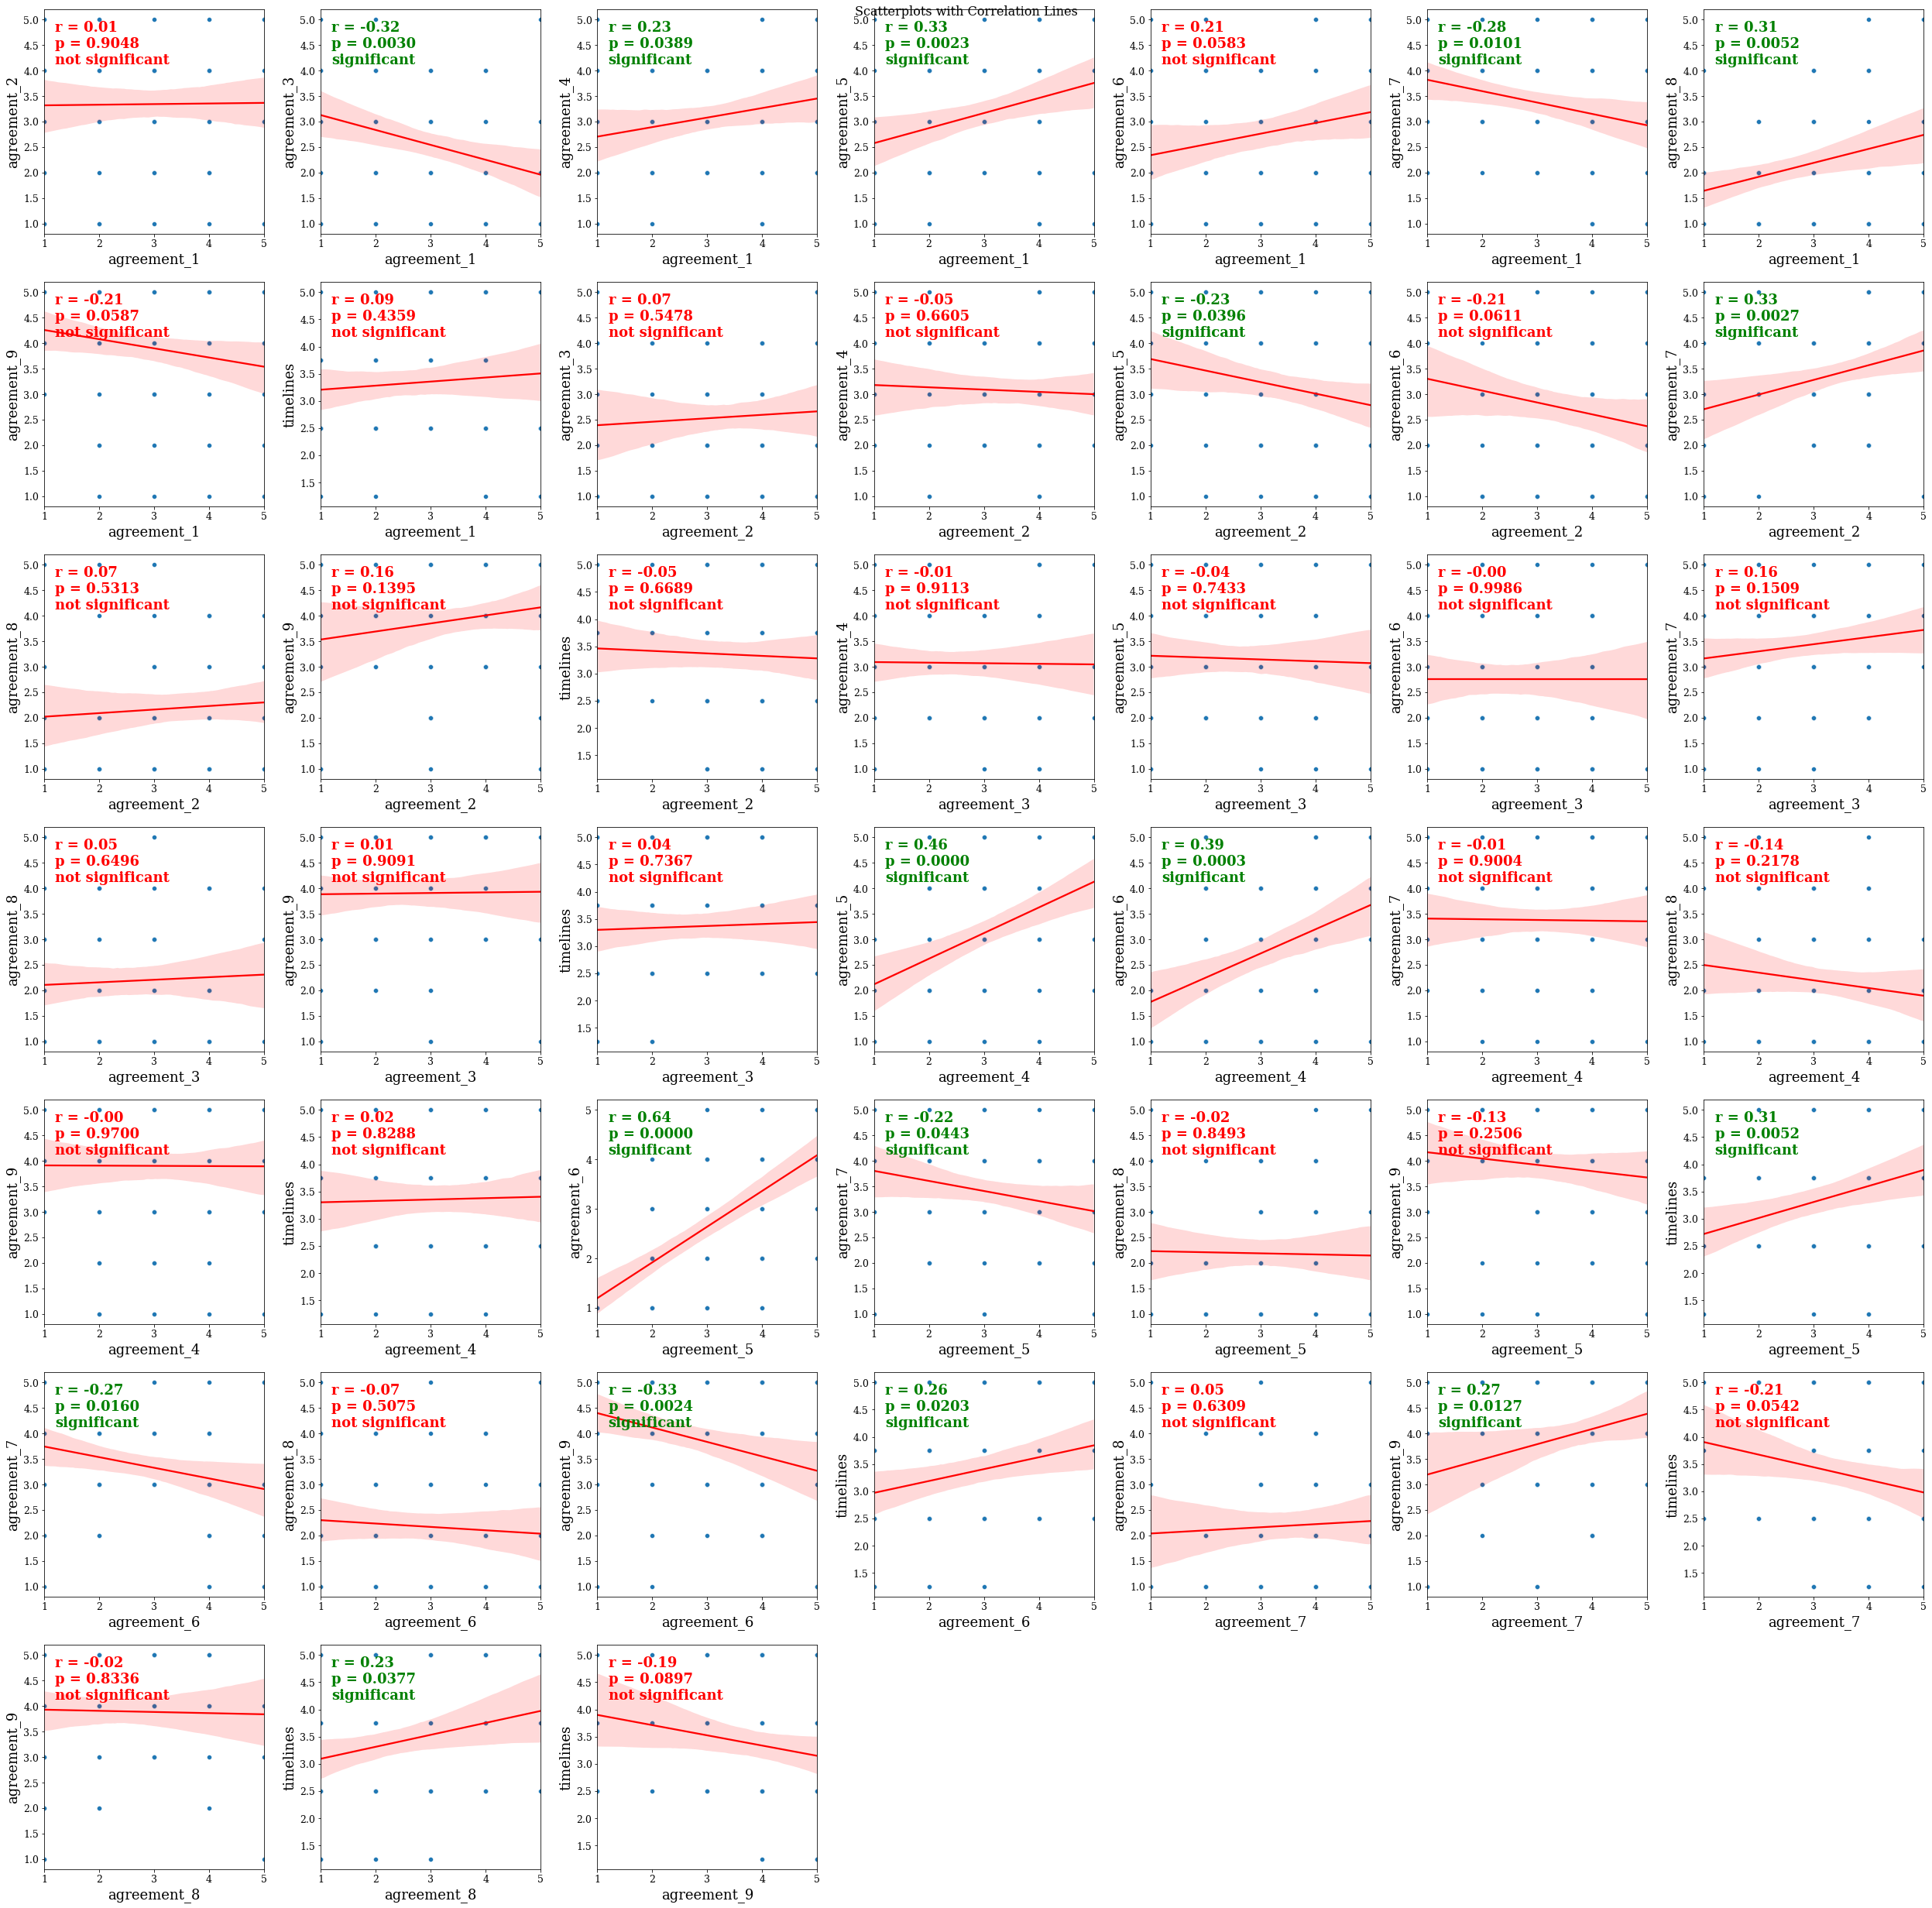

In [24]:

def plot_scatterplot_matrix(df, columns, output_filename='scatterplot_matrix.pdf', alpha=0.05, display_sig=True):
    column_pairs = list(combinations(columns, 2))
    n = len(column_pairs)
    grid_size = int(np.ceil(np.sqrt(n)))
    
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(5*grid_size, 5*grid_size))
    fig.suptitle("Scatterplots with Correlation Lines", fontsize=16)
    
    axes = axes.flatten()
    
    for i, (col1, col2) in enumerate(column_pairs):
        ax = axes[i]
        
        sns.scatterplot(data=df, x=col1, y=col2, ax=ax)
        sns.regplot(data=df, x=col1, y=col2, ax=ax, scatter=False, color='red')
        
        # Calculate correlation coefficient and p-value
        r, p = stats.pearsonr(df[col1], df[col2])
        
        # Determine significance and set text color
        if p < alpha:
            text_color = 'green'
            sig_text = 'significant'
        else:
            text_color = 'red'
            sig_text = 'not significant'
        
        if display_sig:
            ax.text(0.05, 0.95, f'r = {r:.2f}\np = {p:.4f}\n{sig_text}', 
                transform=ax.transAxes, verticalalignment='top', 
                color=text_color, fontweight='bold')
        
        ax.set_xlabel(col1)
        ax.set_ylabel(col2)
    
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    # plt.savefig(output_filename)
    # plt.close()
    plt.show()

# Assuming 'df' is your DataFrame and contains the columns you want to plot
# columns_to_plot = ['Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6', 'Q6_7', 'Q6_8', 'Q6_9', 'Q5']
# columns_to_plot = ['agreement_1', 'agreement_2', 'agreement_3', 'agreement_4','agreement_5', 'agreement_6', 'agreement_7', 'agreement_8','agreement_9', 'familiarity_1', 'familiarity_2', 'familiarity_3','timelines']

# now without the familiarities
columns_to_plot = ['agreement_1', 'agreement_2', 'agreement_3', 'agreement_4','agreement_5', 'agreement_6', 'agreement_7', 'agreement_8','agreement_9', 'timelines']
plot_scatterplot_matrix(df, columns_to_plot, display_sig=True)

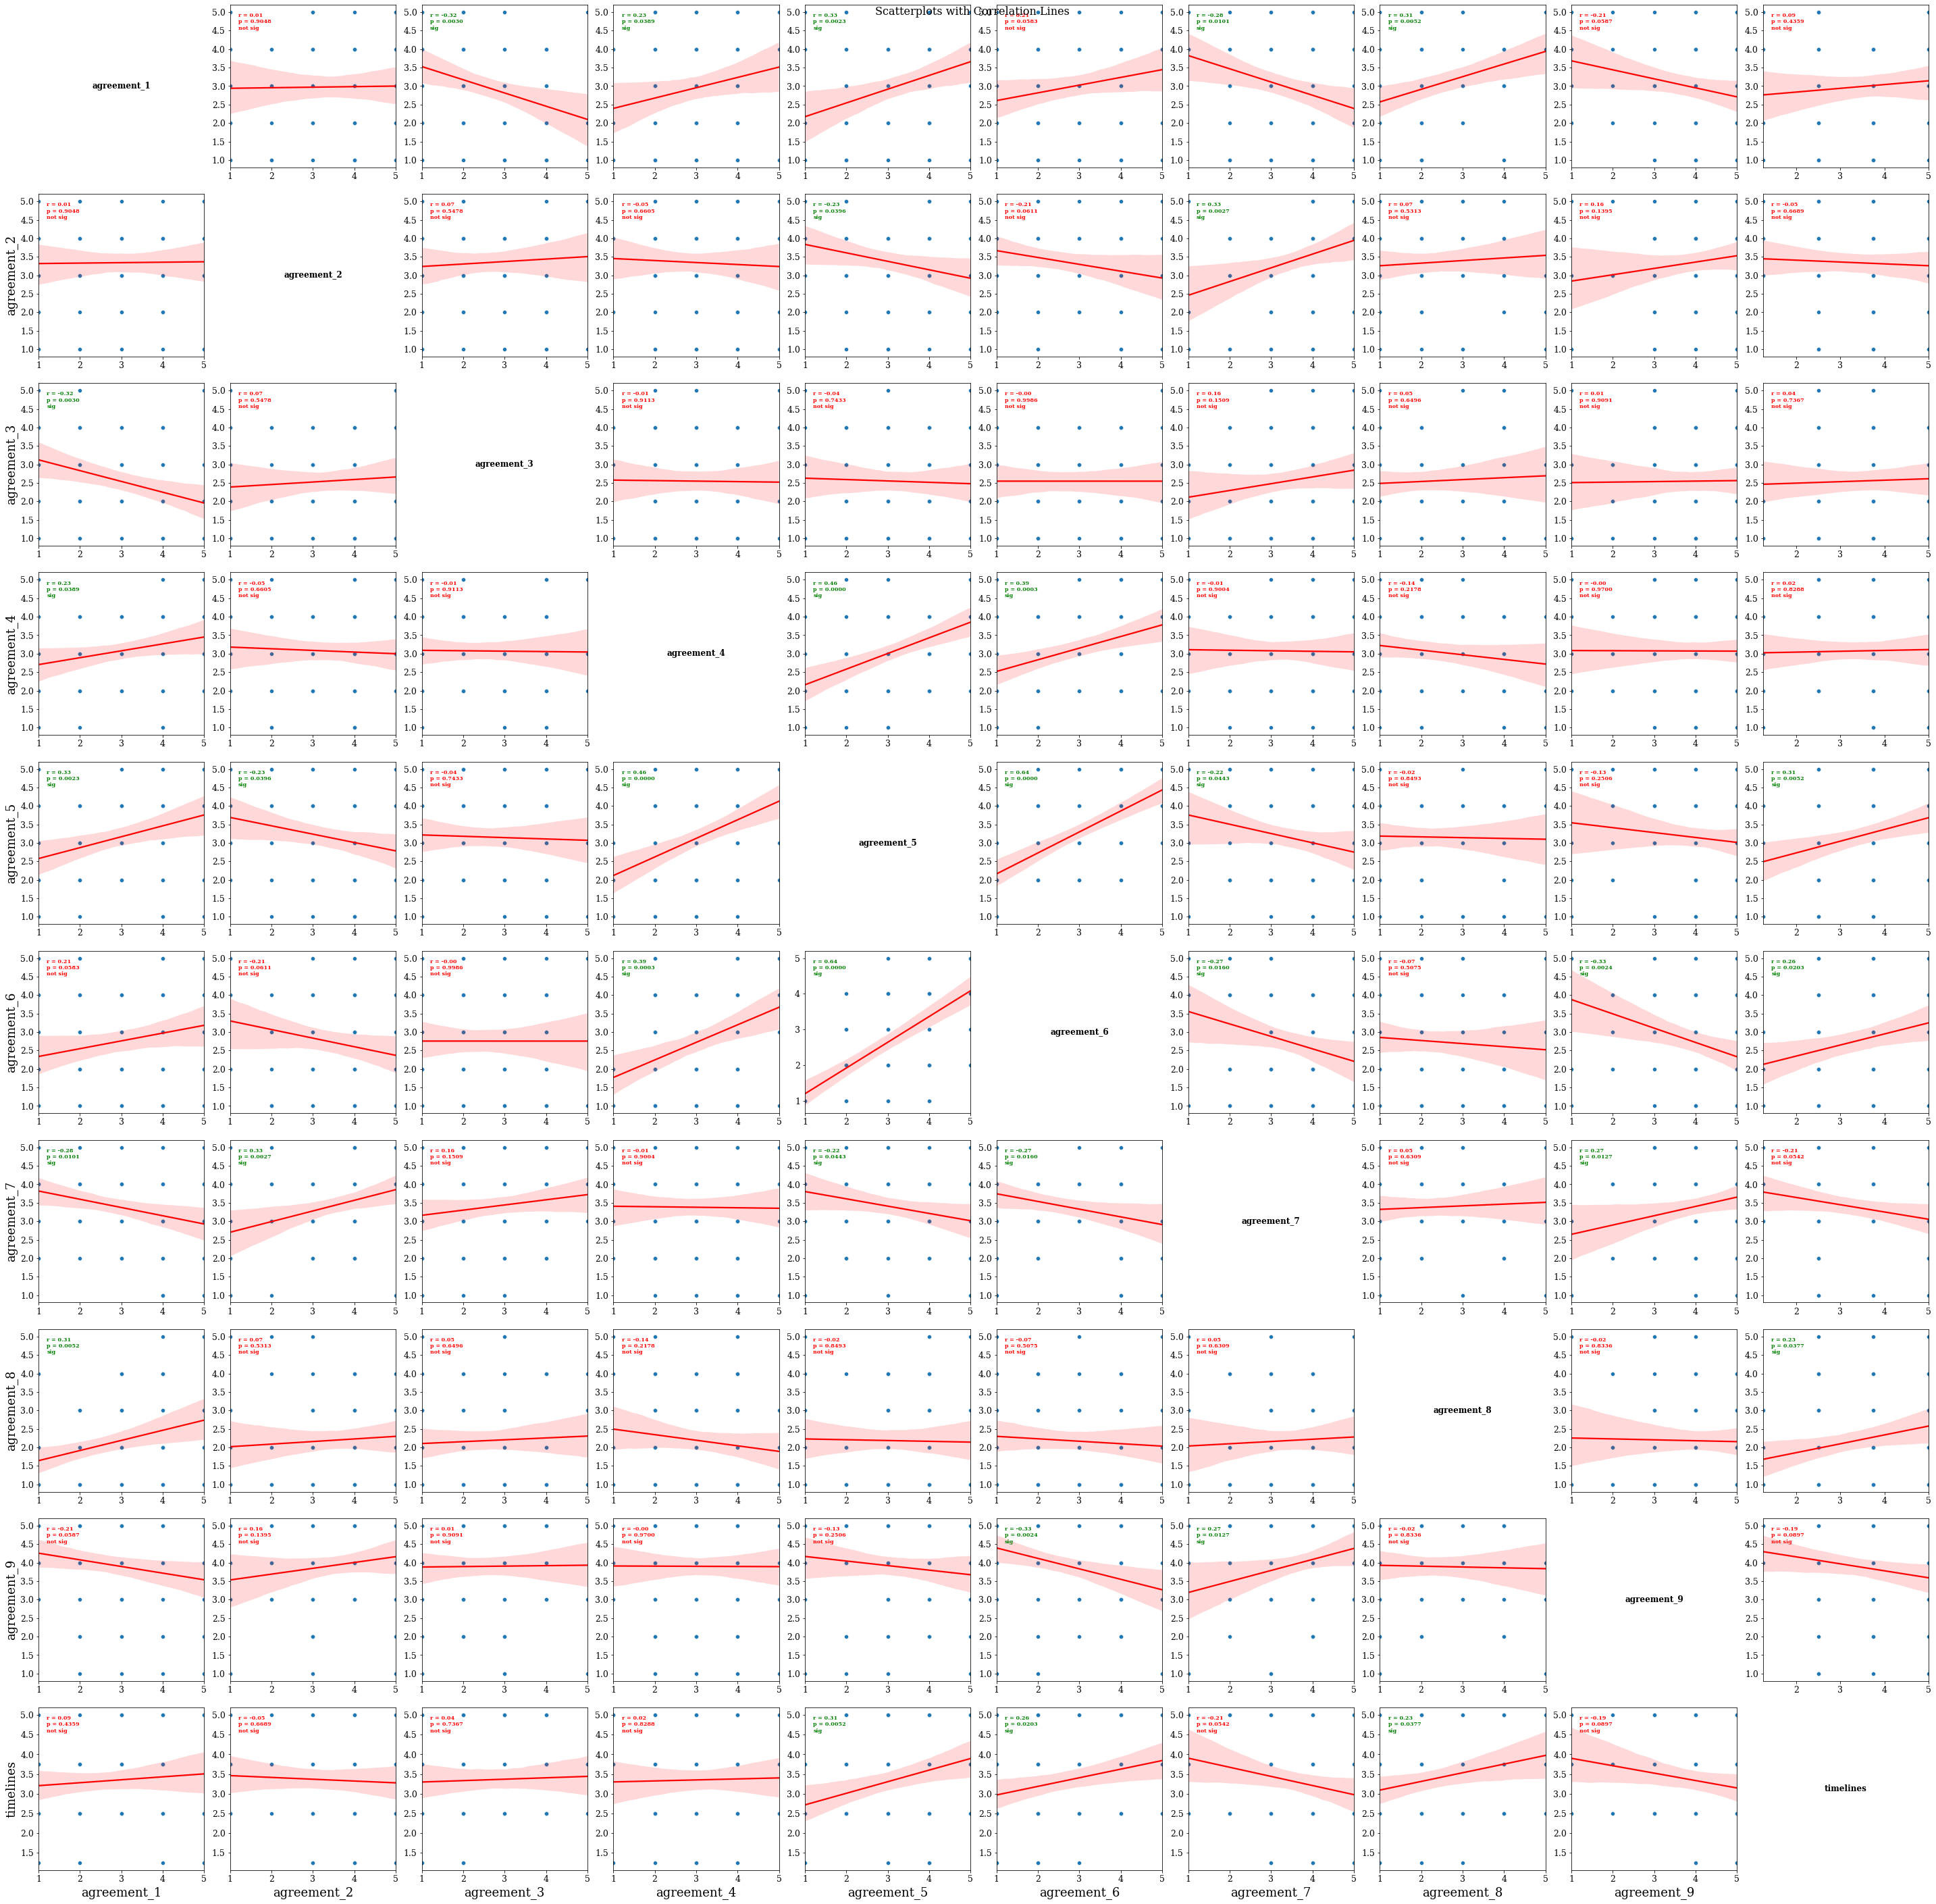

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

def plot_scatterplot_matrix(df, columns, output_filename='scatterplot_matrix_latest.pdf', alpha=0.05, display_sig=True):
    n = len(columns)
    fig, axes = plt.subplots(n, n, figsize=(4*n, 4*n))
    fig.suptitle("Scatterplots with Correlation Lines", fontsize=16)
    
    for i, col1 in enumerate(columns):
        for j, col2 in enumerate(columns):
            ax = axes[i, j]
            
            if i != j:
                sns.scatterplot(data=df, x=col2, y=col1, ax=ax)
                sns.regplot(data=df, x=col2, y=col1, ax=ax, scatter=False, color='red')
                
                r, p = stats.pearsonr(df[col2], df[col1])
                
                if display_sig:
                    if p < alpha:
                        text_color = 'green'
                        sig_text = 'sig'
                    else:
                        text_color = 'red'
                        sig_text = 'not sig'
                    
                    ax.text(0.05, 0.95, f'r = {r:.2f}\np = {p:.4f}\n{sig_text}', 
                            transform=ax.transAxes, verticalalignment='top', 
                            color=text_color, fontweight='bold', fontsize=8)
            else:
                ax.text(0.5, 0.5, col1, horizontalalignment='center', 
                        verticalalignment='center', fontsize=12, fontweight='bold')
                ax.axis('off')
            
            if i < n-1:
                ax.set_xlabel('')
            if j > 0:
                ax.set_ylabel('')
            
            if i == n-1:
                ax.set_xlabel(col2)
            if j == 0:
                ax.set_ylabel(col1)
    
    plt.tight_layout()
    plt.savefig(output_filename)
    plt.show()

# Example usage
# columns_to_plot = ['Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6', 'Q6_7', 'Q6_8', 'Q6_9', 'Q3_1', 'Q3_2', 'Q3_3', 'Q5']
columns_to_plot = ['agreement_1', 'agreement_2', 'agreement_3', 'agreement_4','agreement_5', 'agreement_6', 'agreement_7', 'agreement_8','agreement_9', 'timelines']


# Assuming 'df' is your DataFrame
plot_scatterplot_matrix(df, columns_to_plot, display_sig=True)

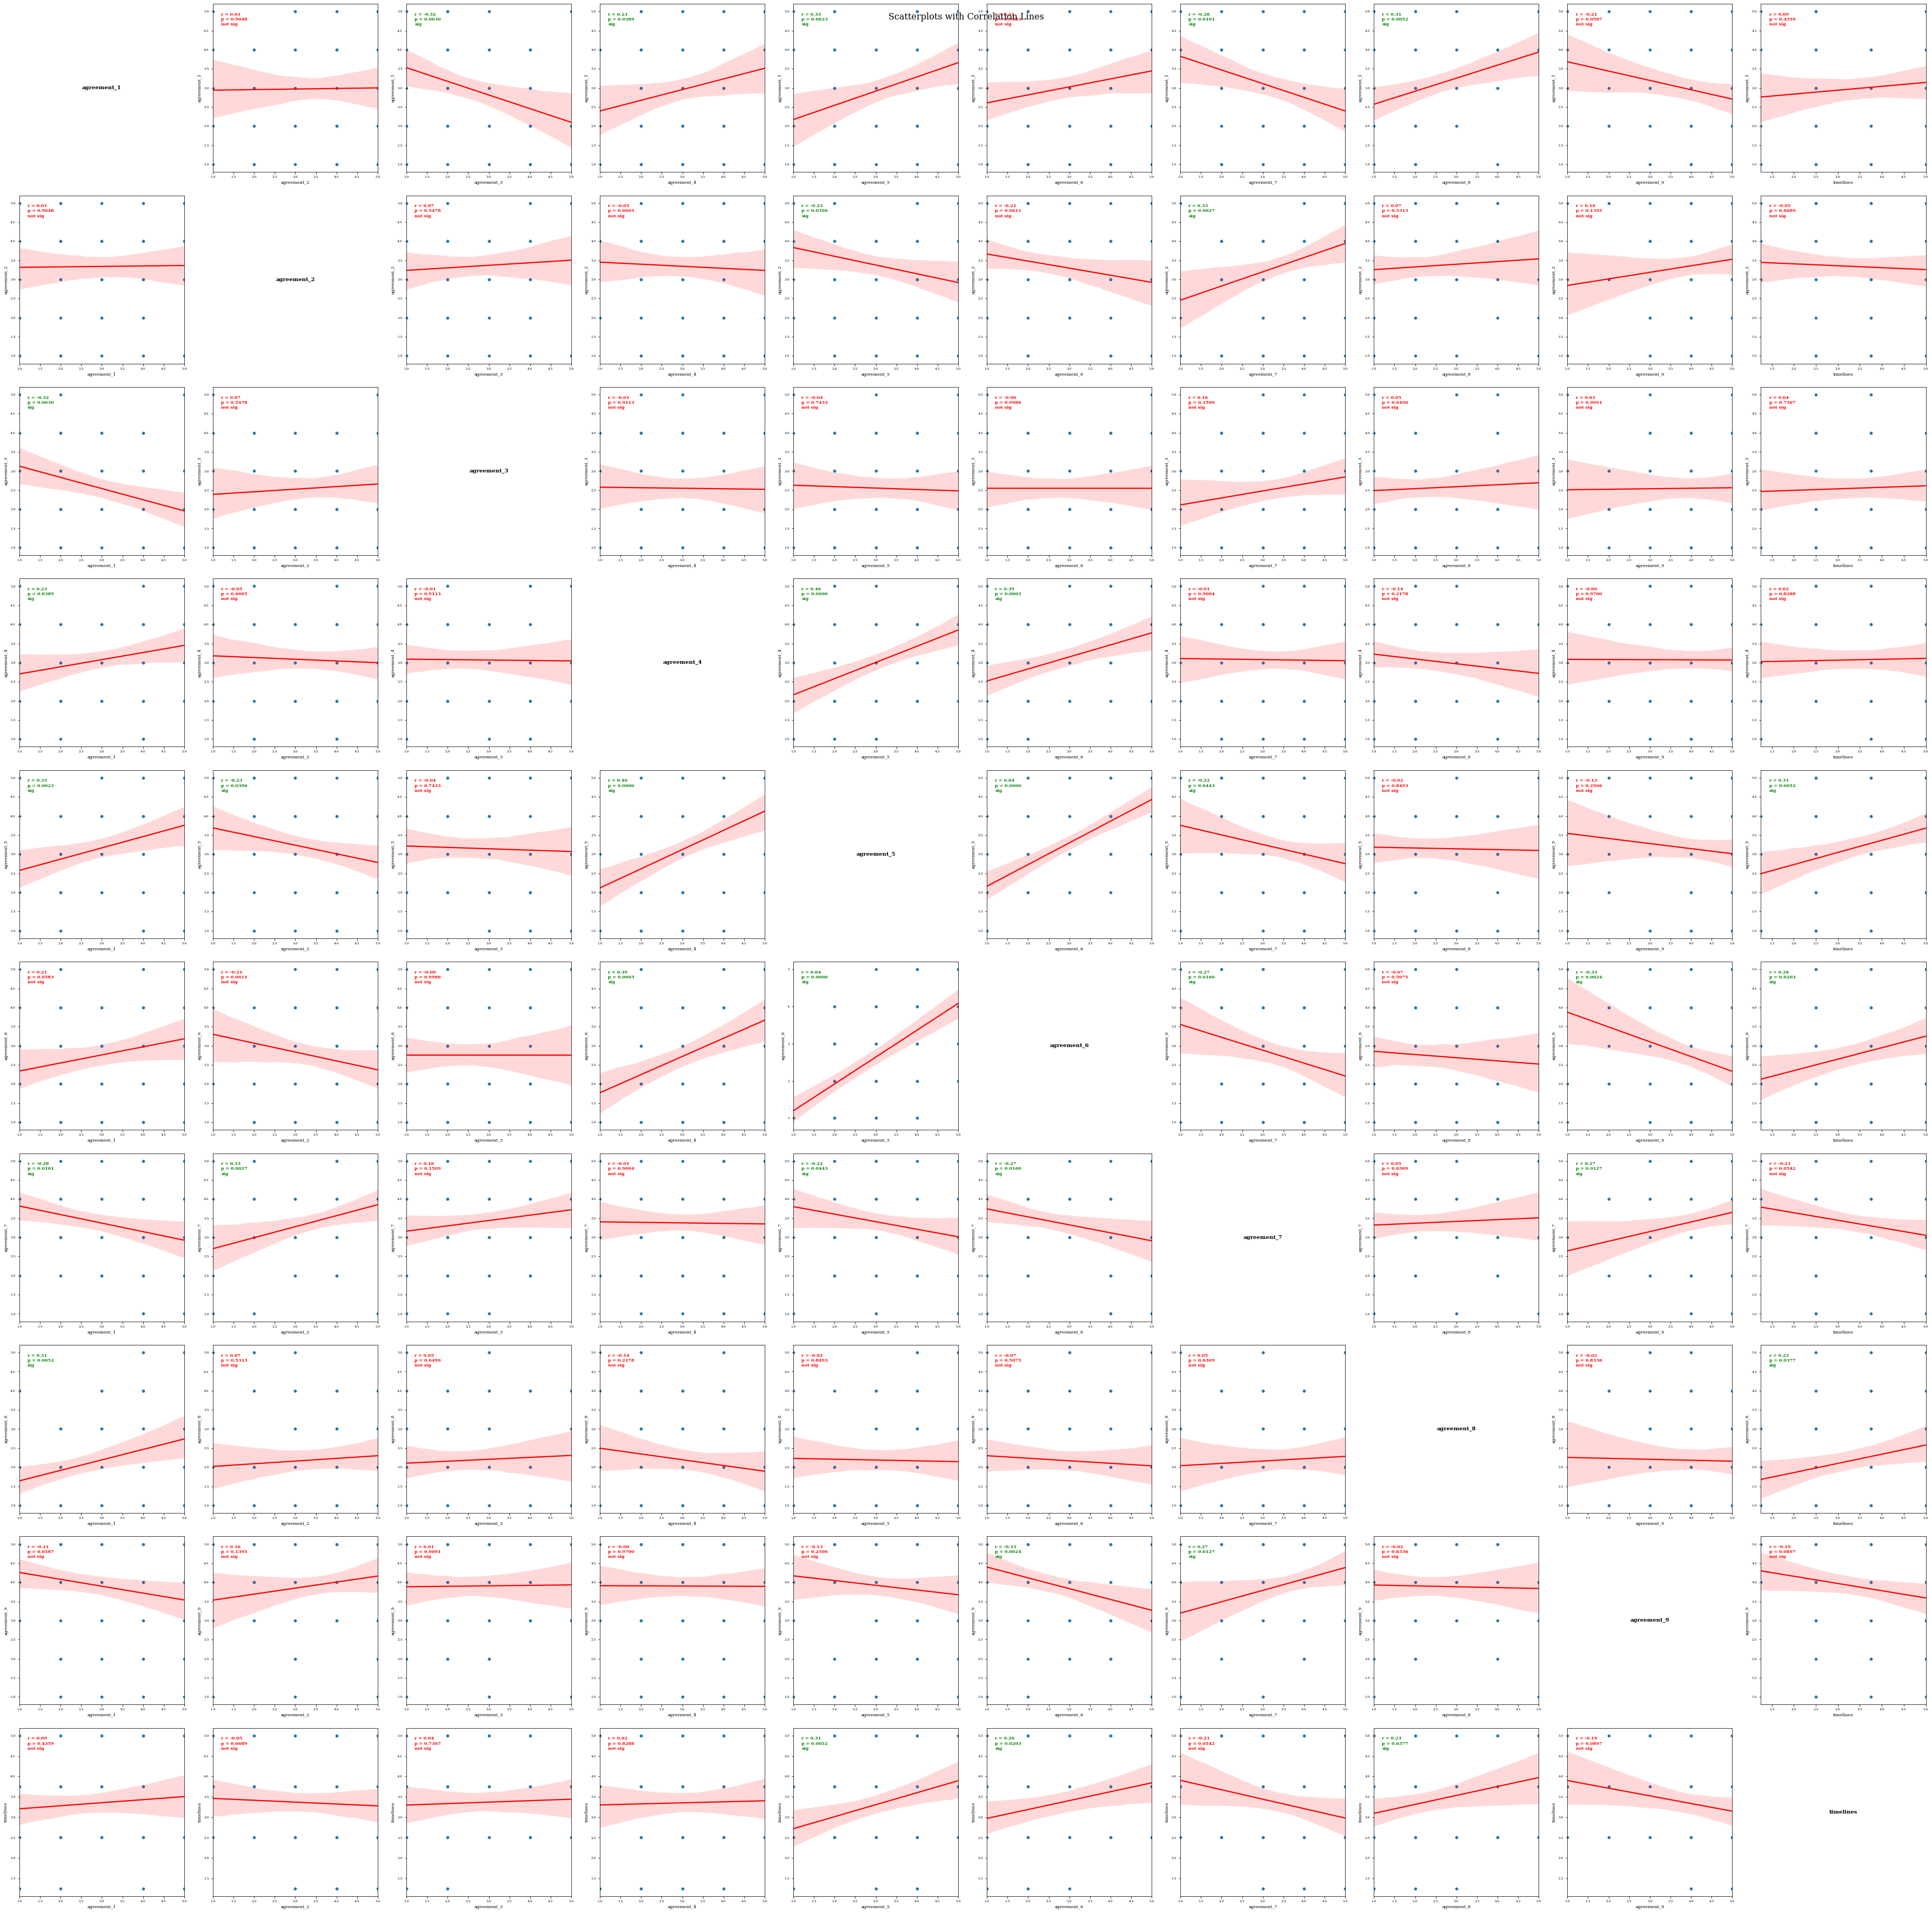

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

def plot_scatterplot_matrix(df, columns, output_filename='scatterplot_matrix.pdf', alpha=0.05, display_sig=True):
    n = len(columns)
    fig, axes = plt.subplots(n, n, figsize=(5*n, 5*n))
    fig.suptitle("Scatterplots with Correlation Lines", fontsize=16)
    
    for i, col1 in enumerate(columns):
        for j, col2 in enumerate(columns):
            ax = axes[i, j]
            
            if i != j:
                sns.scatterplot(data=df, x=col2, y=col1, ax=ax)
                sns.regplot(data=df, x=col2, y=col1, ax=ax, scatter=False, color='red')
                
                r, p = stats.pearsonr(df[col2], df[col1])
                
                if display_sig:
                    if p < alpha:
                        text_color = 'green'
                        sig_text = 'sig'
                    else:
                        text_color = 'red'
                        sig_text = 'not sig'
                    
                    ax.text(0.05, 0.95, f'r = {r:.2f}\np = {p:.4f}\n{sig_text}', 
                            transform=ax.transAxes, verticalalignment='top', 
                            color=text_color, fontweight='bold', fontsize=8)
                
                ax.set_xlabel(col2, fontsize=8)
                ax.set_ylabel(col1, fontsize=8)
                ax.tick_params(axis='both', which='major', labelsize=6)
            else:
                ax.text(0.5, 0.5, col1, horizontalalignment='center', 
                        verticalalignment='center', fontsize=10, fontweight='bold')
                ax.axis('off')
    
    plt.tight_layout()
    plt.savefig(output_filename, dpi=300)
    plt.show()
    plt.close()

# Example usage
columns_to_plot = ['agreement_1', 'agreement_2', 'agreement_3', 'agreement_4','agreement_5', 'agreement_6', 'agreement_7', 'agreement_8','agreement_9', 'timelines']

# Assuming 'df' is your DataFrame
plot_scatterplot_matrix(df, columns_to_plot, display_sig=True)

In [17]:
timelines_questions

'Q5'

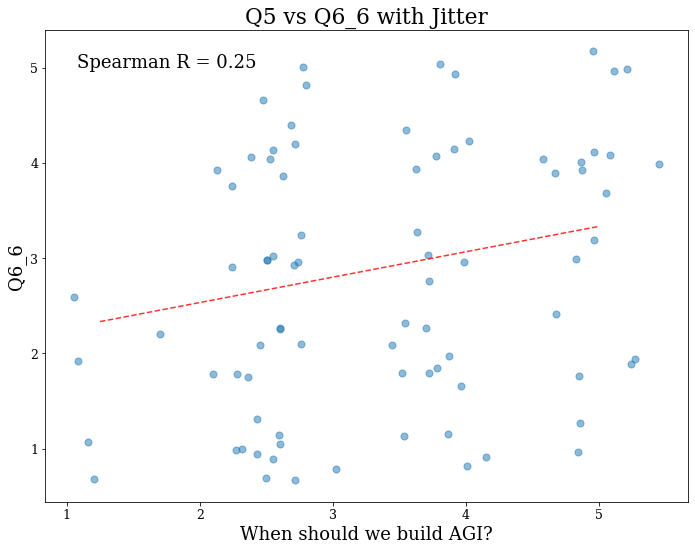

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

def jitter_scatter(x, y, ax=None, jitter=0.2, **kwargs):
    if ax is None:
        ax = plt.gca()
    
    x_jitter = np.random.normal(0, jitter, size=len(x))
    y_jitter = np.random.normal(0, jitter, size=len(y))
    
    ax.scatter(x + x_jitter, y + y_jitter, alpha=0.5, **kwargs)

# Assuming df is your DataFrame
fig, ax = plt.subplots(figsize=(10, 8))

x = df['Q5'].astype(float)
y = df['Q6_6'].astype(float)

jitter_scatter(x, y, ax=ax, s=50)

# Use theilslopes for robust linear regression
slope, intercept, _, _ = stats.theilslopes(y, x)

# Add trendline
x_line = np.array([x.min(), x.max()])
y_line = slope * x_line + intercept
ax.plot(x_line, y_line, "r--", alpha=0.8)

# Calculate and display correlation
correlation, _ = stats.spearmanr(x, y)  # Using Spearman's rank correlation
ax.text(0.05, 0.95, f'Spearman R = {correlation:.2f}', transform=ax.transAxes, 
        verticalalignment='top')

ax.set_xlabel('When should we build AGI?')
ax.set_ylabel('Q6_6')  # Replace with actual question text
ax.set_title('Q5 vs Q6_6 with Jitter')

plt.tight_layout()
plt.show()

Text(0.5, 0, 'When should we build AGI?')

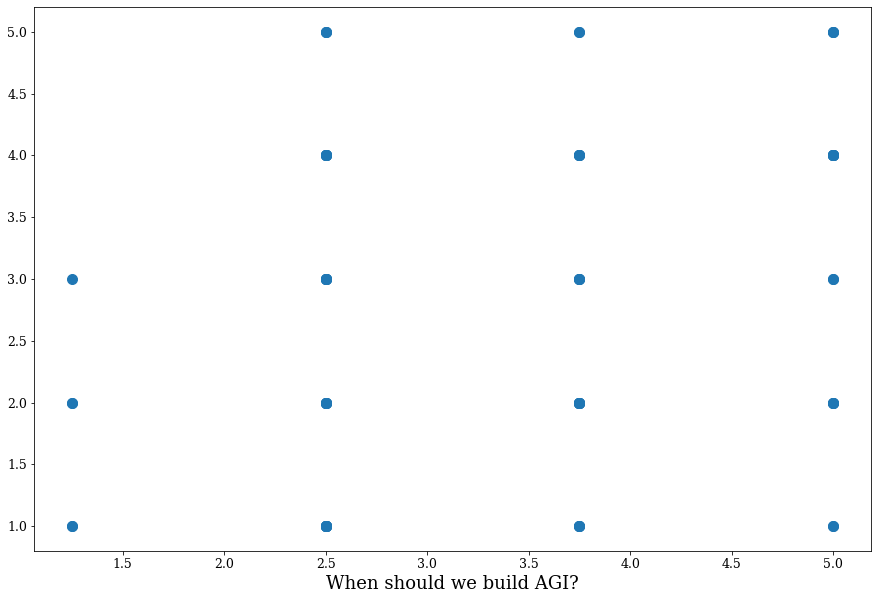

In [19]:
# plot Q_5 vs Q_6_6 as a scatter plot such that the size of the points is the number at that point
plt.figure(figsize=(15, 10))
plt.scatter(df['Q5'], df['Q6_6'], s=100)
plt.xlabel("When should we build AGI?")



